In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Zomato-data-.csv")
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
def handleRate(value):
    value = str(value).split('/')
    return float(value[0])

In [4]:
df['rate'] = df['rate'].apply(handleRate)


In [5]:
df[['rate']].head()


,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [8]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


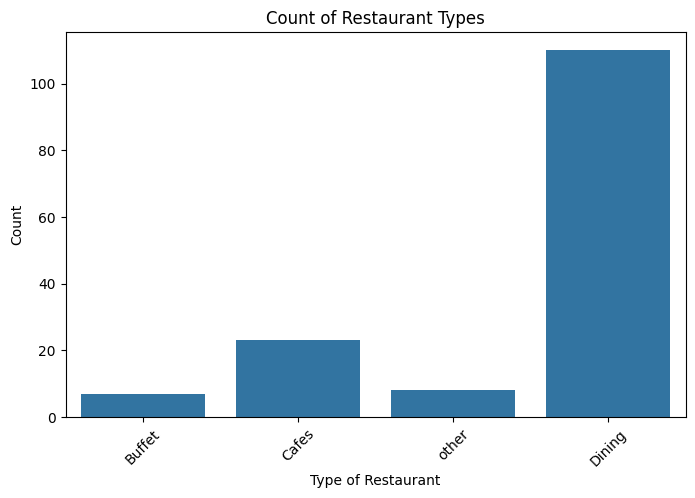

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Count of Restaurant Types")
plt.show()

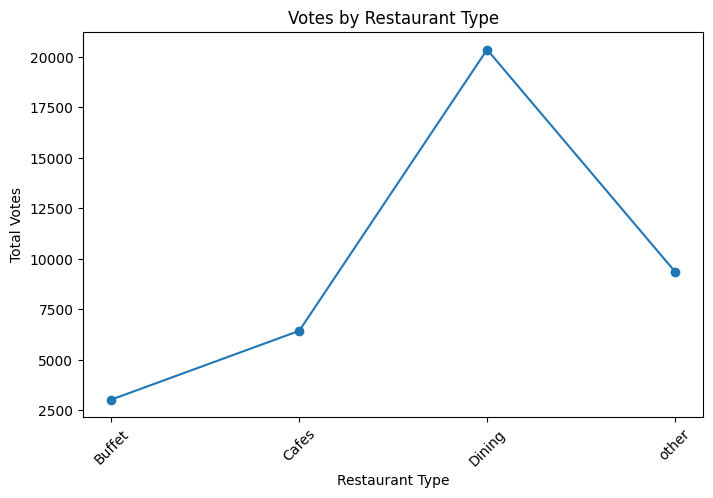

In [10]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()

plt.figure(figsize=(8,5))
plt.plot(grouped_data.index, grouped_data.values, marker='o')
plt.xlabel("Restaurant Type")
plt.ylabel("Total Votes")
plt.title("Votes by Restaurant Type")
plt.xticks(rotation=45)
plt.show()


In [11]:
max_votes = df['votes'].max()
top_restaurant = df[df['votes'] == max_votes]['name']

print("Restaurant(s) with maximum votes:")
print(top_restaurant)


Restaurant(s) with maximum votes:
38    Empire Restaurant
Name: name, dtype: object


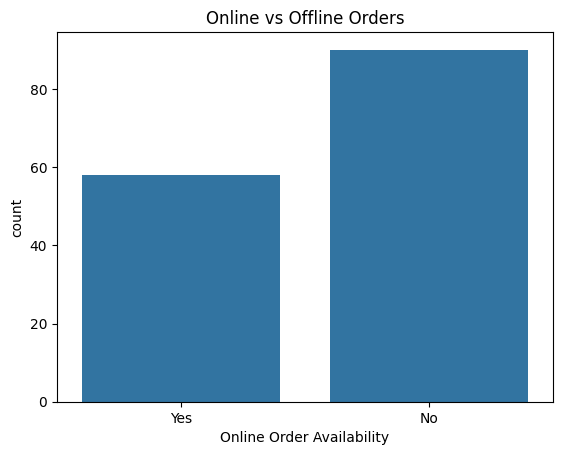

In [12]:
sns.countplot(x=df['online_order'])
plt.xlabel("Online Order Availability")
plt.title("Online vs Offline Orders")
plt.show()


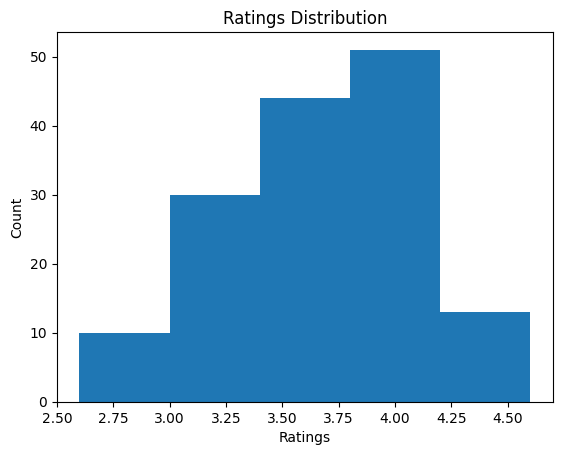

In [13]:
plt.hist(df['rate'], bins=5)
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Ratings Distribution")
plt.show()


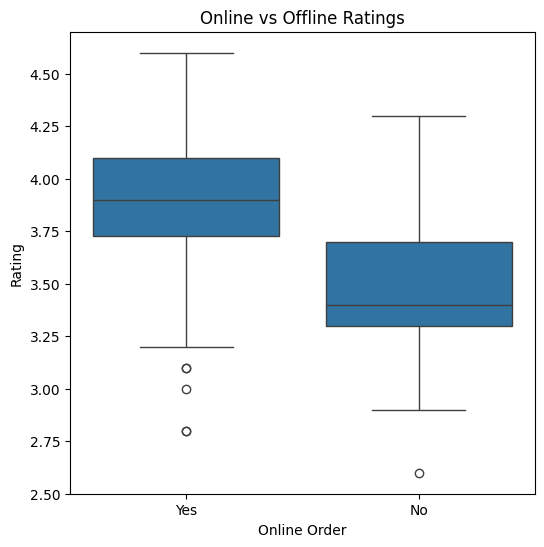

In [14]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.xlabel("Online Order")
plt.ylabel("Rating")
plt.title("Online vs Offline Ratings")
plt.show()



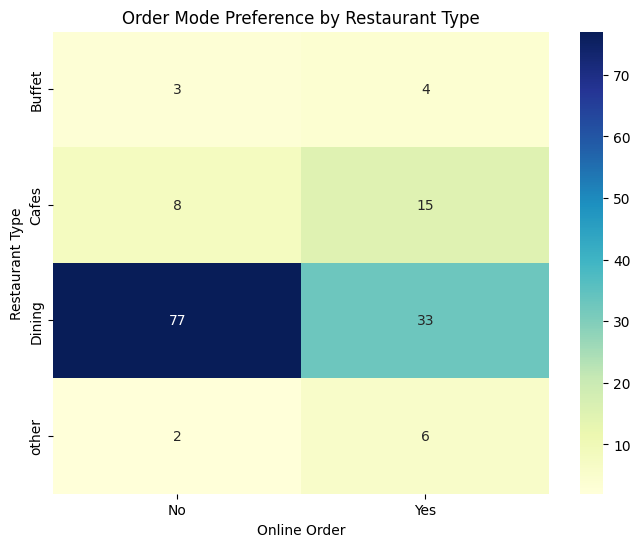

In [15]:
pivot_table = df.pivot_table(
    index='listed_in(type)',
    columns='online_order',
    aggfunc='size',
    fill_value=0
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Online Order")
plt.ylabel("Restaurant Type")
plt.title("Order Mode Preference by Restaurant Type")
plt.show()


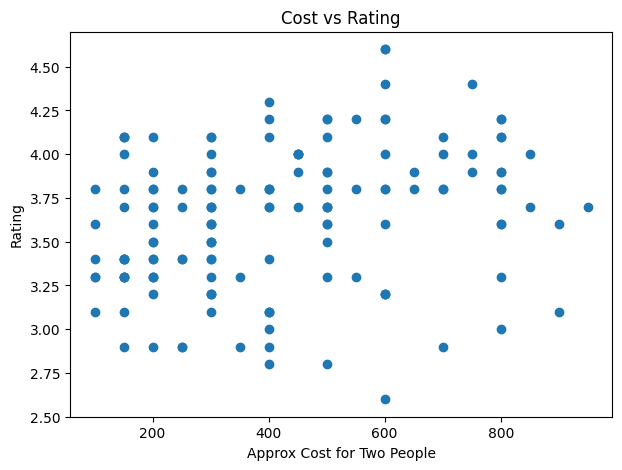

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(df['approx_cost(for two people)'], df['rate'])
plt.xlabel("Approx Cost for Two People")
plt.ylabel("Rating")
plt.title("Cost vs Rating")
plt.show()


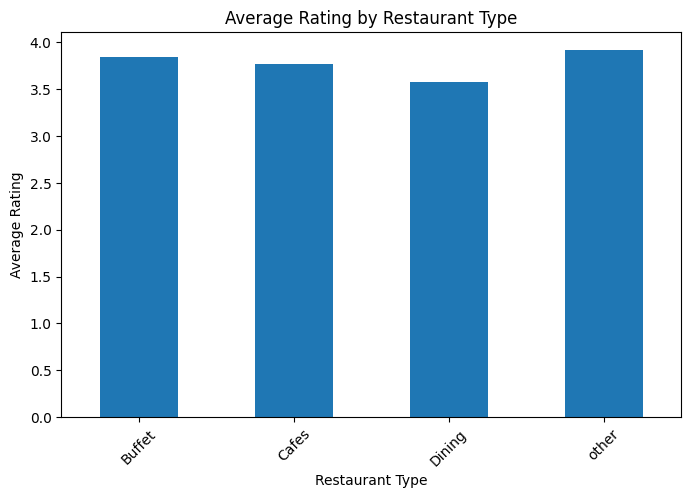

In [17]:
avg_rating = df.groupby('listed_in(type)')['rate'].mean()

plt.figure(figsize=(8,5))
avg_rating.plot(kind='bar')
plt.xlabel("Restaurant Type")
plt.ylabel("Average Rating")
plt.title("Average Rating by Restaurant Type")
plt.xticks(rotation=45)
plt.show()


In [18]:
df.to_csv("cleaned_zomato_data.csv", index=False)